In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

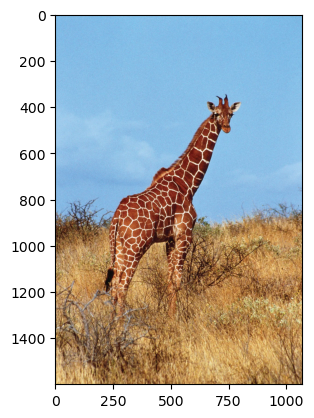

In [4]:

img = cv2.imread("/Users/emmanuelgeorgep/Documents/Courses/ComputerVision/OpenCV/images/giraffe-Kenya.png")
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [5]:
img_rgb.shape

(1600, 1067, 3)

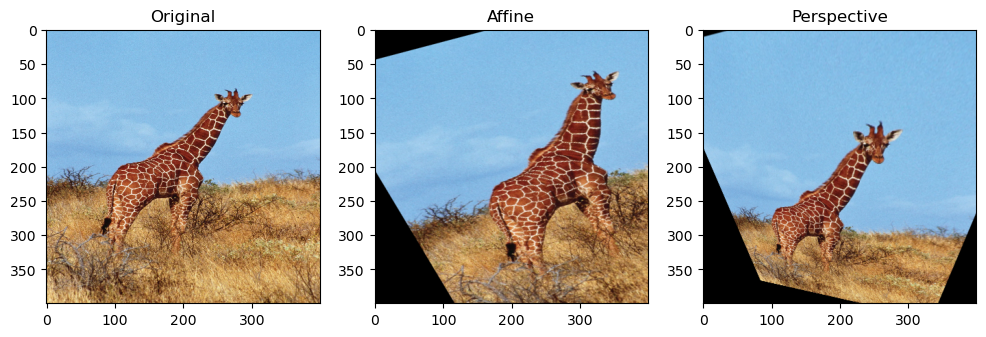

In [6]:

# Resize for consistent viewing
img = cv2.resize(img, (400, 400))

### Affine Transformation ###
pts1_affine = np.float32([[50, 50], [200, 50], [50, 200]])
pts2_affine = np.float32([[10, 100], [200, 50], [100, 250]])

M_affine = cv2.getAffineTransform(pts1_affine, pts2_affine)
affine_result = cv2.warpAffine(img, M_affine, (400, 400))


### Perspective Transformation ###
pts1_perspective = np.float32([[50, 50], [350, 50], [50, 350], [350, 350]])
pts2_perspective = np.float32([[10, 100], [390, 50], [100, 350], [300, 390]])

M_perspective = cv2.getPerspectiveTransform(pts1_perspective, pts2_perspective)
perspective_result = cv2.warpPerspective(img, M_perspective, (400, 400))


# Plotting results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(132), plt.imshow(cv2.cvtColor(affine_result, cv2.COLOR_BGR2RGB)), plt.title('Affine')
plt.subplot(133), plt.imshow(cv2.cvtColor(perspective_result, cv2.COLOR_BGR2RGB)), plt.title('Perspective')
plt.show()

(-0.5, 1066.5, 1599.5, -0.5)

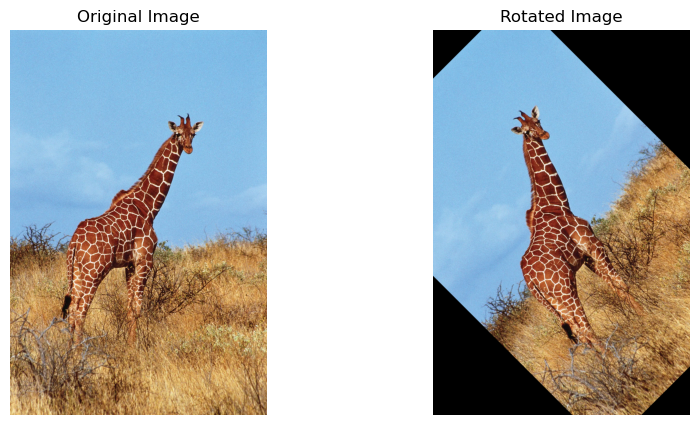

In [9]:
rows, cols, _ = img_rgb.shape
angle = 45
center = (cols // 2, rows // 2)
scale = 1.0

M = cv2.getRotationMatrix2D(center,angle, scale)

rotated_image = cv2.warpAffine(img_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.axis("off")

(-0.5, 2133.5, 1599.5, -0.5)

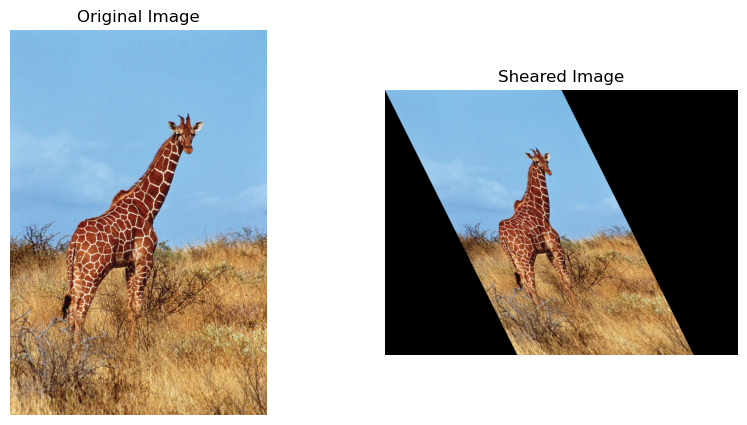

In [10]:
shear_x, shear_y = 0.5, 0

M = np.float32([[1, shear_x, 0], 
           [shear_y, 1, 0]])


sheared_image = cv2.warpAffine(img_rgb, M, (cols*2, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis("off")

(-0.5, 1066.5, 1599.5, -0.5)

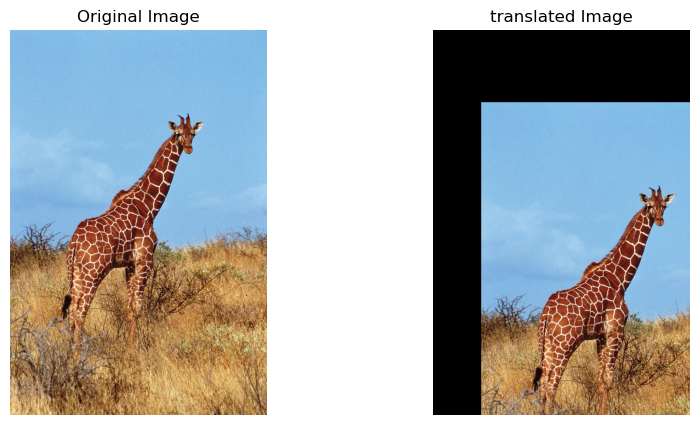

In [11]:
tx, ty = 200, 300

M = np.float32([[1, 0, tx], 
           [0, 1, ty]])


translated_image = cv2.warpAffine(img_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("translated Image")
plt.axis("off")